In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

### Sample data

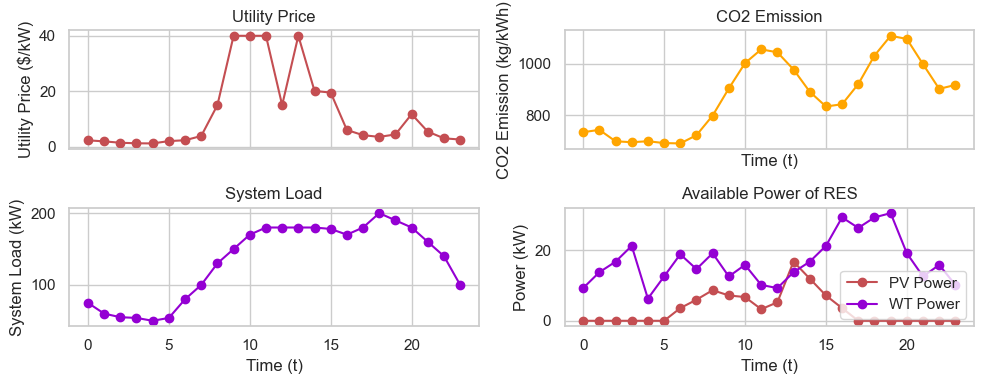

In [6]:
pv_data = np.load('./data/sample/pv.npy')
wt_data = np.load('./data/sample/wt.npy')
price_data = np.load('./data/sample/price.npy')
load_data = np.load('./data/sample/load.npy')
co2_data = np.load('./data/sample/co2.npy')

# Create the index array (1 to 24) for the horizontal axis
t = np.arange(0, 24)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 4), sharex=True)
axs = axs.flatten()

# Plot Price_utility
axs[0].plot(t, price_data, marker='o', linestyle='-', color='r')
axs[0].set_ylabel('Utility Price ($/kW)')
axs[0].set_title('Utility Price')
axs[0].grid(True)

# Plot CO2_emission
axs[1].plot(t, co2_data, marker='o', linestyle='-', color='orange')
axs[1].set_xlabel('Time (t)')
axs[1].set_ylabel('CO2 Emission (kg/kWh)')
axs[1].set_title('CO2 Emission')
axs[1].grid(True)

# Plot Power_load
axs[2].plot(t, load_data, marker='o', linestyle='-', color='darkviolet')
axs[2].set_xlabel('Time (t)')
axs[2].set_ylabel('System Load (kW)')
axs[2].set_title('System Load')
axs[2].grid(True)

# Plot PV/Wind
axs[3].plot(t, pv_data, marker='o', linestyle='-', color='r', label='PV Power')
axs[3].plot(t, wt_data, marker='o', linestyle='-', color='darkviolet', label='WT Power')
axs[3].set_xlabel('Time (t)')
axs[3].set_ylabel('Power (kW)')
axs[3].set_title('Available Power of RES')
axs[3].grid(True)
axs[3].legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


### 2024 time-series

In [97]:
# Load the datasets
generation_df = pd.read_csv('./data/2024/generation.csv')
gen_forecast_df = pd.read_csv('./data/2024/gen_forecast.csv')
load_df = pd.read_csv('./data/2024/load.csv')
price_df = pd.read_csv('./data/2024/price.csv')
emission_df = pd.read_csv('./data/2024/emission.csv').drop(0)

In [121]:
import pandas as pd

def extract_values(df, columns):
    extracted_values = []
    for index, row in df.iterrows():
        row_values = [row[col] for col in columns]
        extracted_values.append(row_values)
    return extracted_values


# Extract values using the generalized function
gen_values = extract_values(generation_df, ['Solar - Actual Aggregated [MW]', 
                                            'Wind Offshore - Actual Aggregated [MW]', 
                                            'Wind Onshore - Actual Aggregated [MW]'])

gen_forecast_values = extract_values(gen_forecast_df, ['Generation - Solar [MW] Day Ahead/ BZN|NL', 
                                                       'Generation - Wind Offshore [MW] Day Ahead/ BZN|NL', 
                                                       'Generation - Wind Onshore [MW] Day Ahead/ BZN|NL'])

load_values = extract_values(load_df, ['Actual Total Load [MW] - Netherlands (NL)', 
                                       'Day-ahead Total Load Forecast [MW] - Netherlands (NL)'])

price_values = extract_values(price_df, ['Day-ahead (EUR/MWh)'])
emission_values = extract_values(emission_df, ['emissionfactor (kg CO2/kWh)'])

# Process generation values to combine wind offshore and onshore
gen_values_processed = []
for solar, wind_offshore, wind_onshore in gen_values:
    wind_total = wind_offshore + wind_onshore
    gen_values_processed.append([solar, wind_total])

forecast_values_processed = []
for solar, wind_offshore, wind_onshore in gen_forecast_values:
    wind_total = wind_offshore + wind_onshore
    forecast_values_processed.append([solar, wind_total])

price_values = np.repeat(price_values, 4)
emission_values.append(emission_values[-1])
emission_values = np.repeat(emission_values, 4)

# Print the results (optional)
print("Generation Values:", len(gen_values_processed[:len(price_values)]))
print("Forecast Values:", len(forecast_values_processed[:len(price_values)]))
print("Load Values:", len(load_values[:len(price_values)]))
print("Price Values:", len(price_values[:len(price_values)]))
print("Emission Values:", len(emission_values[:len(price_values)]))

Generation Values: 35136
Forecast Values: 35136
Load Values: 35136
Price Values: 35136
Emission Values: 35136


In [133]:
# Step 2: Combine the lists into a single DataFrame
combined_data = []
for i in range(len(price_values)):
    day = i//96
    row = {
        'day': day,                           # Day number
        'solar (MW)': gen_values_processed[i][0],  # Solar value
        'wind (MW)': gen_values_processed[i][1],   # Wind value (offshore + onshore)
        'load (MW)': load_values[i][0],     # Actual load
        'solar_forcast (MW)': forecast_values_processed[i][0],  # Solar forecast
        'wind_forecast (MW)': forecast_values_processed[i][1],  # Wind forecast
        'load_forecast (MW)': load_values[i][1],   # Load forecast
        'price (EUR/MWh)': price_values[i],          # Price value
        'emission factor (kg CO2/MWh)': emission_values[i]*1000     # Emission value
    }
    combined_data.append(row)

In [136]:
grid_df = pd.DataFrame(combined_data)
grid_df.to_csv('./data/grid_data.csv', index=False)
grid_df.head()

,day,solar (MW),wind (MW),load (MW),solar_forcast (MW),wind_forecast (MW),load_forecast (MW),price (EUR/MWh),emission factor (kg CO2/MWh)
0,0,0.0,5393.0,11257.0,0.0,6053.0,10783.0,0.10,73.013522
1,0,0.0,5415.0,11279.0,0.0,6037.0,10713.0,0.10,73.013522
2,0,0.0,5405.0,11291.0,0.0,6023.0,10626.0,0.10,73.013522
3,0,0.0,5411.0,11266.0,0.0,6008.0,10527.0,0.10,73.013522
4,0,0.0,5441.0,11312.0,0.0,5993.0,10457.0,0.01,73.224798


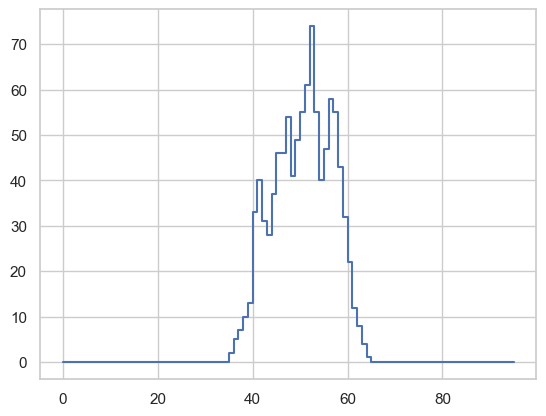

In [59]:
generation_df = pd.read_csv('./data/2024/generation_entsoe.csv')
plt.plot(generation_df["Solar - Actual Aggregated [MW]"][:24*4], drawstyle='steps-pre')

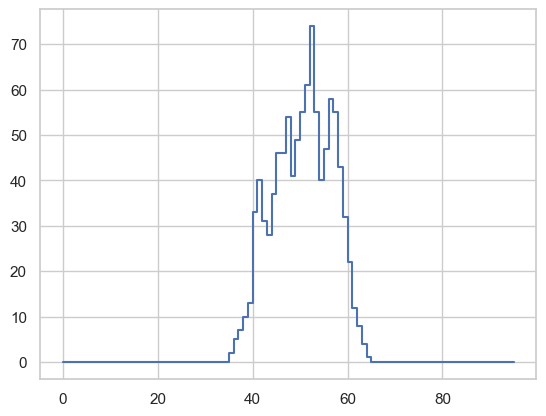